In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_row = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_row

('2017-08-23',)

2016-08-23 00:00:00


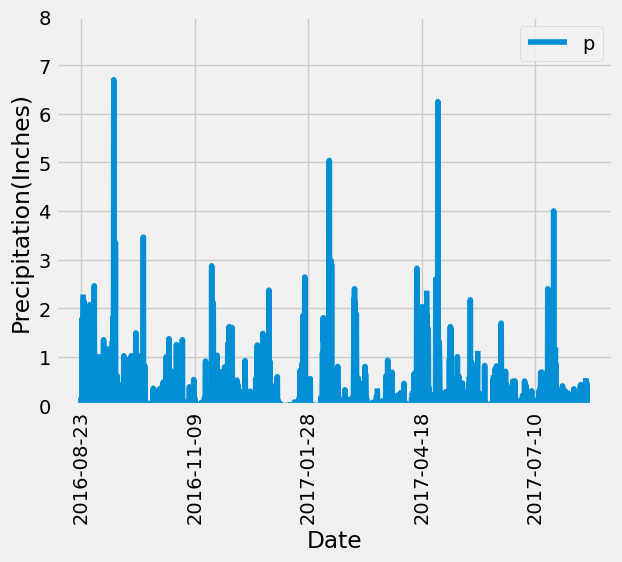

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime(last_row[0],'%Y-%m-%d')
yearago_date = last_date - dt.timedelta(days=365)
print(yearago_date)
# Perform a query to retrieve the data and precipitation scores
precipitation_query = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()

#print(precipitation_query)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_query, columns = ["Date", "Precipitation"])
precipitation_df.set_index("Date", inplace=True)

precipitation_df

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.ylim(0,8)
plt.xticks(rotation = 90)

plt.xlabel("Date")
plt.ylabel("Precipitation(Inches)")
plt.legend("precipitation", loc = 'upper right')

plt.show()





In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.date))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.date)).all()
print(most_active)


[('USC00518838', 511), ('USC00517948', 1372), ('USC00511918', 1979), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00519523', 2669), ('USC00513117', 2709), ('USC00519397', 2724), ('USC00519281', 2772)]


In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp_query = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station =='USC00519281')
    
for station in station_temp_query:
    print(station)
    

('USC00519281', 54.0, 85.0, 71.66378066378067)


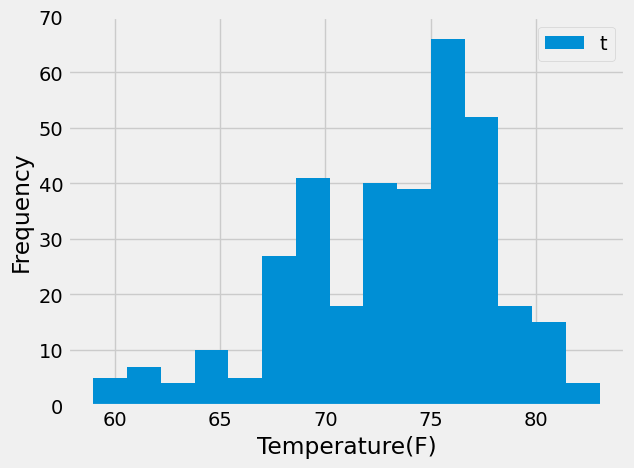

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_observation_query = session.query(Measurement.date, Measurement.tobs)\
    .filter((Measurement.date >= yearago_date), (Measurement.station =='USC00519281'))\
    .group_by(Measurement.date)\
    .order_by(Measurement.date).all()

#print(station_observation_query)

temp_df = pd.DataFrame(station_observation_query, columns = ["Date", "Temperature"])

plt.hist(temp_df['Temperature'], bins=15)
plt.ylim(0,70)
plt.xlabel("Temperature(F)")
plt.ylabel("Frequency")
plt.legend("tobs", loc = "upper right")

plt.show()





# Close Session

In [16]:
# Close Session
session.close()